# Neural & Behavioral Modeling - Week 14 (Exercises)
by Your Name (Your Email)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from matplotlib.pyplot import *
from IPython.display import *
import numpy as np

## 1 Integrate-and-Fire Neuron with A Refractory Period (4 points)

Please modify the leaky integrate-and-fire model to produce the following dynamics showing <a href="https://en.wikipedia.org/wiki/Refractory_period_(physiology)">refractory/inactivation periods</a> like the following:

<img src="https://courses.cit.cornell.edu/ece5990/ECE5725_Fall2017_projects/aj373_ssd56_website/images/centerLED.png" width=70%>

Unlike the above figure, you need to produce "spikes" in your implementation.

### 1.0 The Leaky Integrate-and-Fire Model

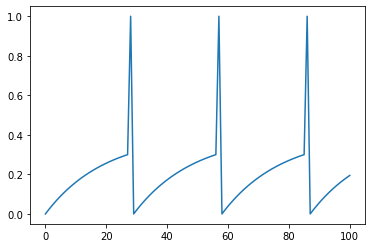

In [2]:
I=2;g=5;C=10;Vrst=0;Vthr=.3;Vspk=1;

dt=.1; V=[Vrst];
for t in np.arange(0,10,dt):
    V1=V[-1] # the last element
    s=V1>Vthr; # An implicit IF-THEN hack
    V2=s*Vrst+(1-s)*(V1+dt/C*(-g*V1+I)) # Euler integration
    V1=s*Vspk+(1-s)*V1 # Spiking now?
    V[-1]=V1; V.append(V2)

plot(V);

### 1.1 Your modified I-F model

In [3]:
# Please write your codes here.

## 2 The Hodgkin–Huxley Model (4 points)
Please read P.19, P.20, & P.21 of the article by <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1392413/pdf/jphysiol01442-0106.pdf">Hodgkin & Huxley (1952)</a>
to implement the very original Hodgkin–Huxley model using their equations and parameters. You should observe something like Fig.22 in their paper.

### 2.0 Modern implementation of the H-H model

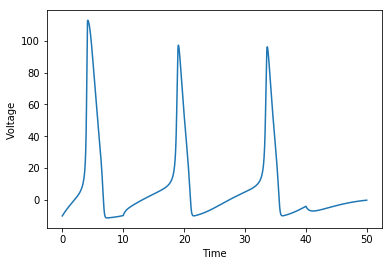

In [4]:
# Integration of Hodgkin--Huxley equations with Euler method
g=np.array([36, 120, 0.3]) # Maximal conductances (in units of mS/cm^2); 1=K, 2=Na, 3=l
E=np.array([-12, 115, 10.613]) # Resting potentials (in mV):
# Some initializations: some variables
gnmh=np.zeros(3); Alpha=np.zeros(3); Beta=np.zeros(3); x=np.zeros(3); 
x[2]=1; I_ext=0; V=[-10]; dt=0.01; 

tspan=np.arange(0,50,dt)
for t in tspan:
    
    V1=V[-1] # the last element
    if(t>=10 and t<=40):
        I_ext=10  # turns external current on when t=[10,40]
    else:  
        I_ext=0   
        
  # alpha functions:
    Alpha[0]=0.01*(10-V1)/(np.exp((10-V1)/10)-1)
    Alpha[1]=0.1*(25-V1)/(np.exp((25-V1)/10)-1)
    Alpha[2]=0.07*np.exp(-V1/20)
    
  # beta functions:
    Beta[0]=0.125*np.exp(-V1/80)
    Beta[1]=4*np.exp(-V1/18)
    Beta[2]=1/(np.exp((30-V1)/10)+1)
    
  # tau_x and x_0 (x=0,1,2) are defined with alpha and beta
    tau=1/(Alpha+Beta);
    x_inf=Alpha*tau;
    x=x+dt*(x_inf-x)/tau;
    
  # calculate actual conductances g with given n, m, h
    gnmh[0]=g[0]*x[0]**4;
    gnmh[1]=g[1]*x[1]**3*x[2];
    gnmh[2]=g[2];
    
  # Ohm's law
    I=gnmh*(V1-E);
    V2=V1+dt*(I_ext-sum(I))
    V.append(V2)
    
plot(tspan,V[:-1]); 
xlabel('Time'); ylabel('Voltage');

### 2.1 Your implementation of the original H-H model

In [5]:
# Please write your codes here.